# Introduction

This notebook will cover the Iris flower data set (Fisher's Iris data set). The aim is to classify iris flowers among three species (setosa, versicolor or virginica) using measurements of length and width of sepals and petals. This is a multivariate data set, which simply means that the data set contains more than one attribute for each instance of a class, in this case each instance has four attributes. This data set contains three classes each with fifty instances, for a total of 150. The three classes are *Iris-setosa*, *Iris-versicolor* and *Iris-virginica*. The four attributes for each instance are *sepal_length*, *sepal_width*, *petal_length* and *petal_width*. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

The *Iris-setosa* class is linearly separable from both the *Iris-versicolor* and *Iris-virginica*, but the *Iris-versicolor* and *Iris-virginica* are NOT linearly separable from each other without the species information that Ronald Fisher used. This is a good example of the difference between supervised and unsupervised techniques in data mining. These definitions are as follows:
-  [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning)<br>
    *"Supervised learning is the Data mining task of inferring a function from labeled training data.The training data consist of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called thesupervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a “reasonable” way."*
-  [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning)<br>
    *"In Data mining, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the examples given to the learner are unlabeled, there is no error or reward signal to evaluate a potential solution."*

Below is an image displaying the supervised learning network architecture required to represent the classification function:

![Image](https://www.neuraldesigner.com/images/learning/iris_flowers_neural_network_graph.png)
This is broken down into the following sections:
-  Inputs<br>The inputs section contains information about the input variables in the neural network, these input variables are the attributes defined above.
-  Scaling layer<br>This layer contains information about how we scale the input variables, we will use the minimum and maximum method for scaling.
-  Neural network<br>The neural network must have four inputs and three output neurons, one for each difinitive class.
-  Probabilistic layer<br>The probabilistic layer allows the outputs to be interpreted as probabilities.
-  Outputs<br>The outputs from this neural network are the probability of each class.

# Iris Dataset Contents

In this notebook I will be using a series of libraries which are all imported below. You can find out more about these libraries in the links below, as these libraries are not the core focus of this notebook they will not be covered here.
-  [pandas](https://pandas.pydata.org/)
-  [seaborn](https://seaborn.pydata.org/index.html)
-  [sklearn](http://scikit-learn.org/stable/)

##### Loading the libraries

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##### Loading the data set with specified names.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataFrame = pandas.read_csv(url, names=names)

##### Breakdown of the data

In [3]:
# shape of the data set
print(dataFrame.shape)

(150, 5)


In [4]:
# class distribution of the data set
print(dataFrame.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
# view the first 20 rows of the data set
print(dataFrame.head(20))

    sepal-length  sepal-width  petal-length  petal-width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
# view the last 20 rows of the data set
print(dataFrame.tail(20))

     sepal-length  sepal-width  petal-length  petal-width         species
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7        

In [7]:
# statistical description of the data set
print(dataFrame.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


##### Visualising the data

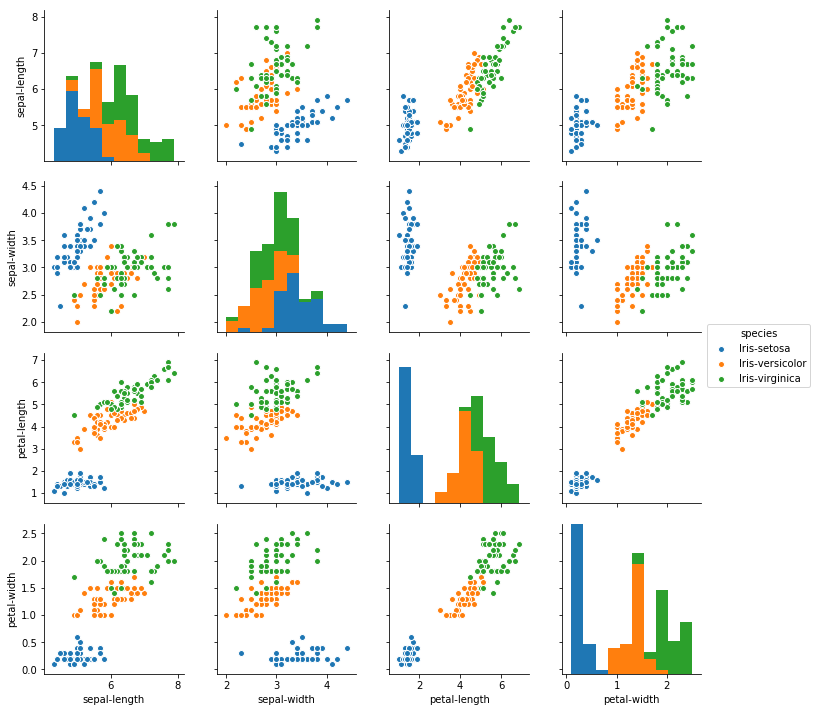

In [8]:
sns.pairplot(dataFrame, hue="species")

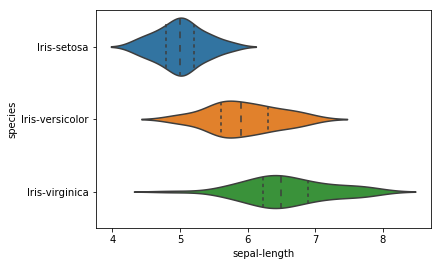

In [16]:
sns.violinplot(y='species', x='sepal-length', data=dataFrame, inner='quartile')

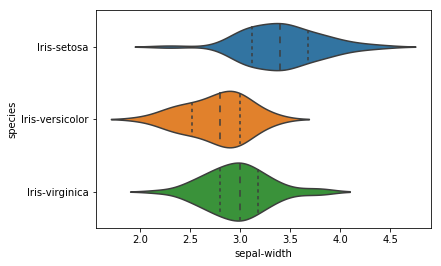

In [13]:
sns.violinplot(y='species', x='sepal-width', data=dataFrame, inner='quartile')

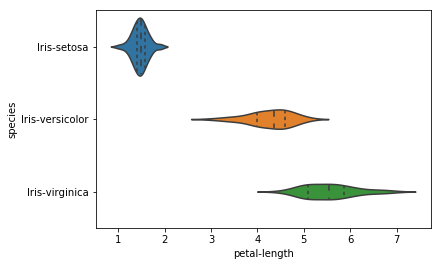

In [14]:
sns.violinplot(y='species', x='petal-length', data=dataFrame, inner='quartile')

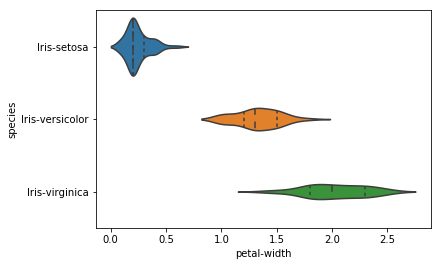

In [15]:
sns.violinplot(y='species', x='petal-width', data=dataFrame, inner='quartile')

# Iris Dataset Implementation

In order to determine if the model is accurate we need to split the dataset up. We will use 80% of the data to train our model and the final 20% will be used to validate the accuracy of our model. Splitting the data up this way will give us an independent idea as to the accuracy of our model. We will also need to split the string values from the floating point data. We will name the string arrays Y_train and Y_test and the floating point arrays will be named X_train and X_test.

In [25]:
# Split up the validation dataset
array = dataFrame.values
# split dataset up into two arrays, one for floating 
# point values and another for string values
X = array[:,0:4]
Y = array[:,4]

# random_state is defining a random number seed
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


Below we will be using the metric of ‘accuracy‘ to evaluate models. This is the percentage of correct predictions. We will be using this variable when we run, build and evaluate each model next.

In [50]:
# Test options and evaluation metric
seed = 5
scoring = 'accuracy'

##### models

The linear models we will be using are as follows:
-  [Logistic Regression](http://www.statisticssolutions.com/what-is-logistic-regression/) (LR)
-  [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) (LDA)

The non-linear models we will be using are as follows:
-  [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (KNN).
-  [Classification and Regression Trees](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/) (CART).
-  [Gaussian Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) (NB).
-  [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM).


In [51]:
# models array
models = []
# appending the linear models
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# appending the nonlinear models
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [52]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


As we can see from the above results, the accuracy of each model is very high. The model with the best accuracy is the K-NearestNeighbours, because the core focus is the dataset itself I will only display the predictions of this model as an example.

In [70]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
# fitting the training data to the model
knn.fit(X_train, Y_train)
# make a prediction on the test set
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



As we can see the predictions are very accurate, averaging within 10% 

# Sources

[Iris Flower Classification](https://www.neuraldesigner.com/learning/examples/iris_flowers_classification)<br>
[Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)<br>
[Iris Data Set Wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)<br>
[Python Iris Data Set Implementation](https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset)<br>
[Python Iris Data Set Walkthrough](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)<br>
[]()<br>
[]()<br>
[]()<br>
[]()<br>
[]()<br>
[]()<br>
[]()<br>
[]()<br>